60000 training samples
10000 test samples


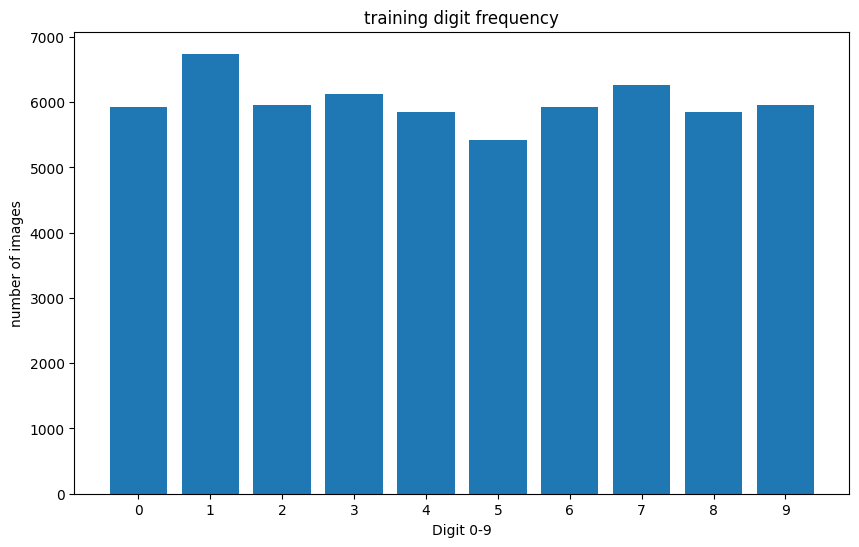

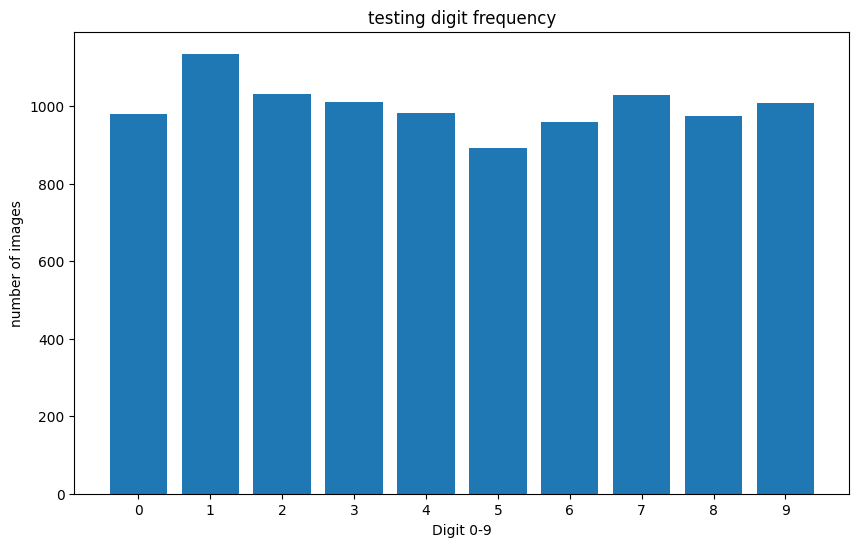

(60000, 784)
(60000,)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

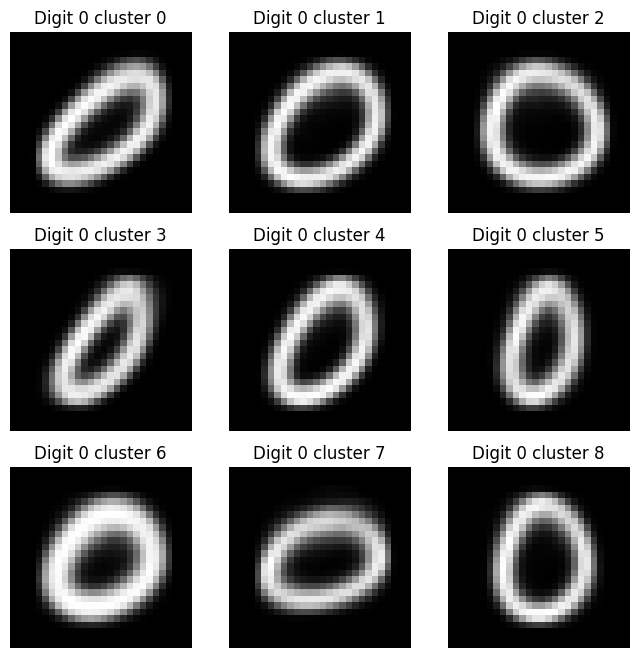

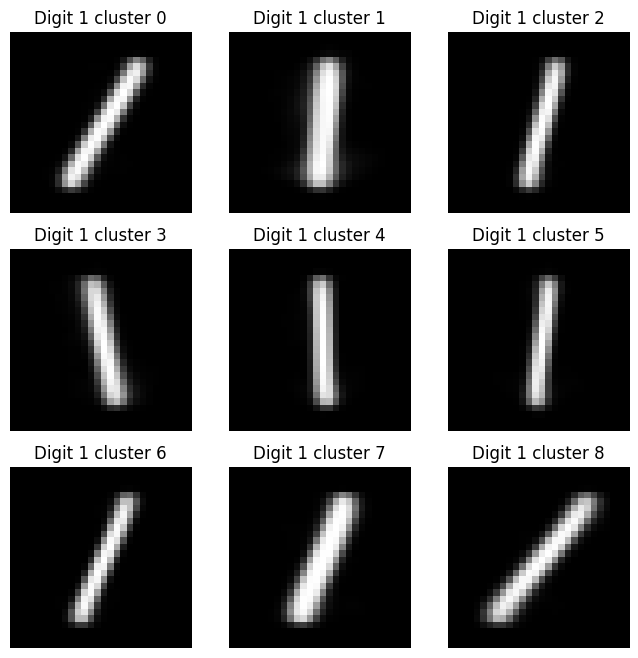

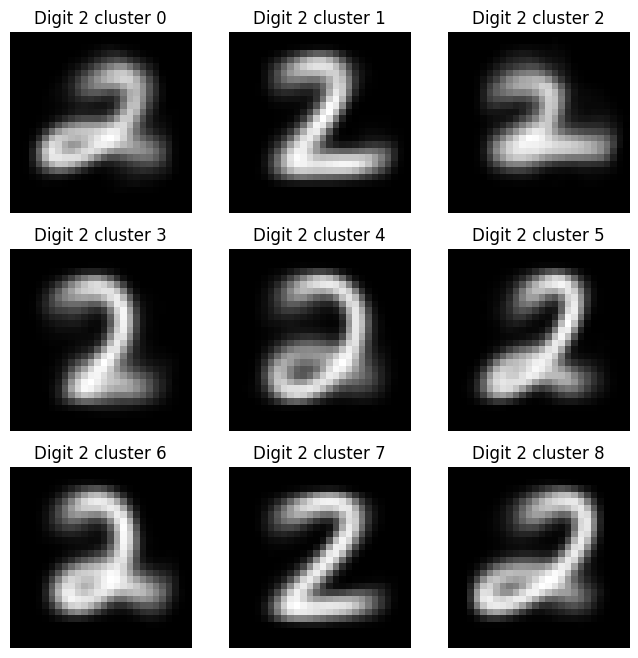

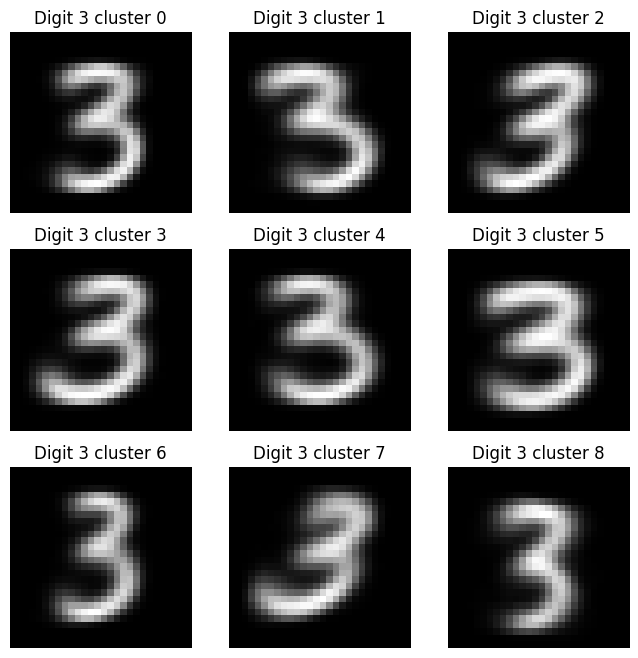

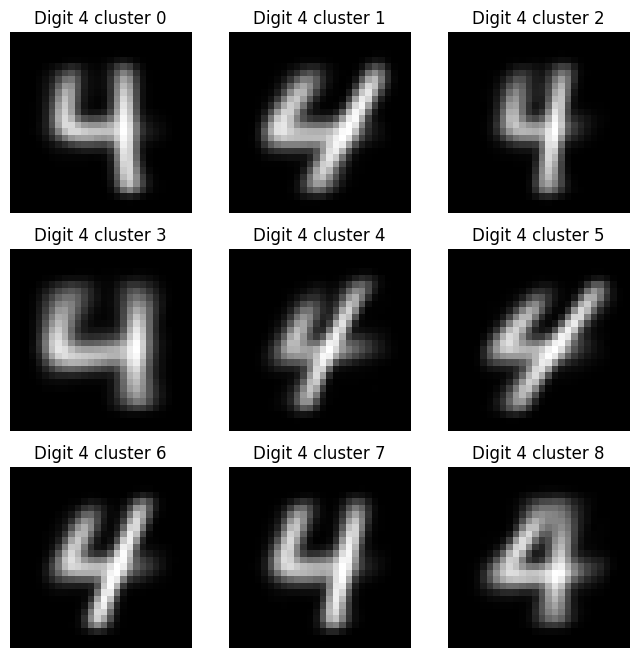

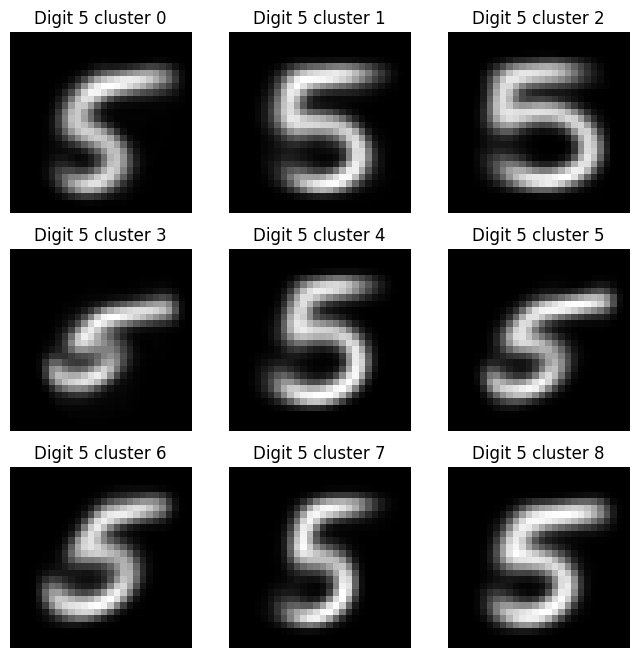

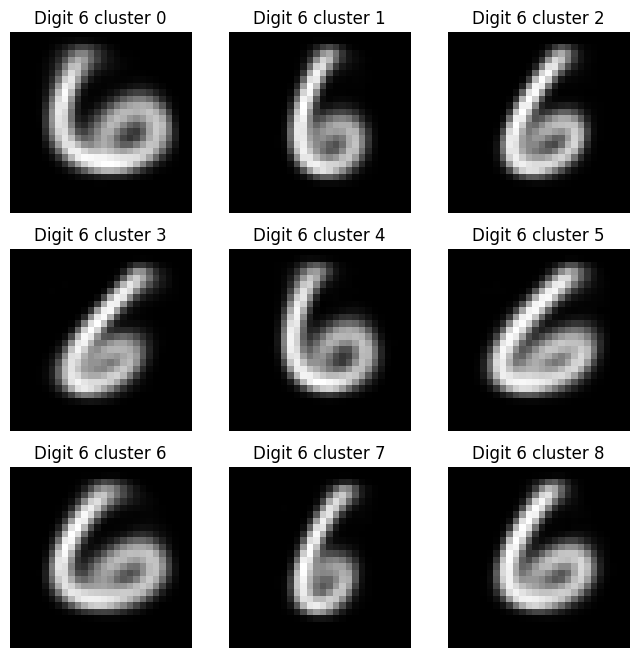

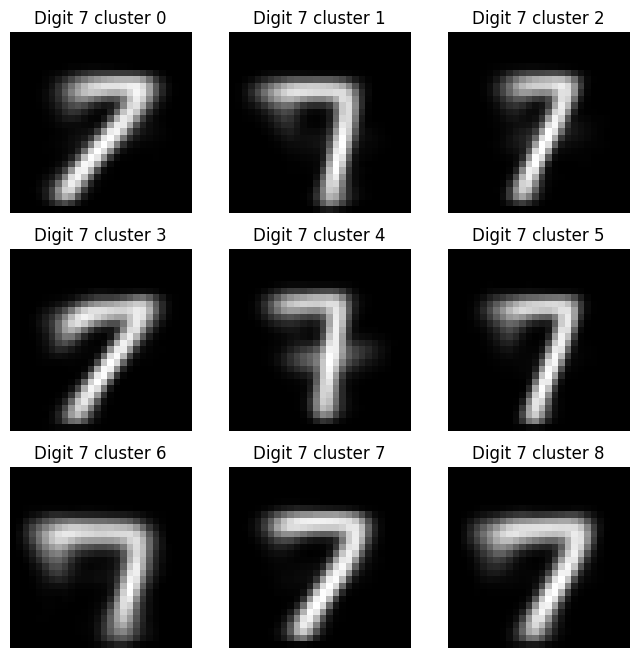

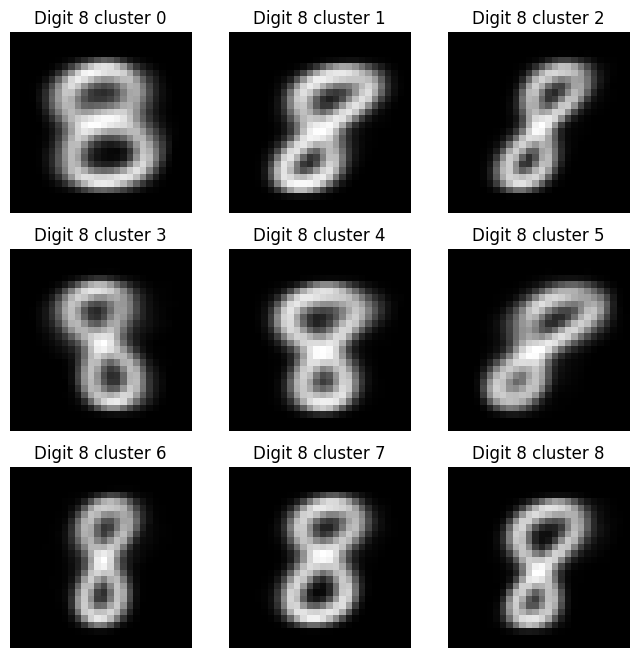

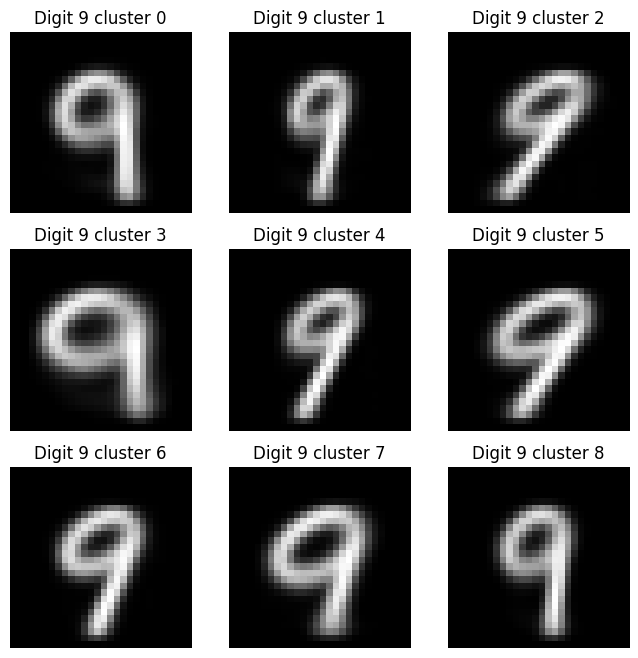

(10000, 784)
(10000,)
(9, 784)
(5923,)
(60000, 784)
(60000,)
training time cost (seconds): 0.7215971946716309
Testing Accuracy: 92.33%


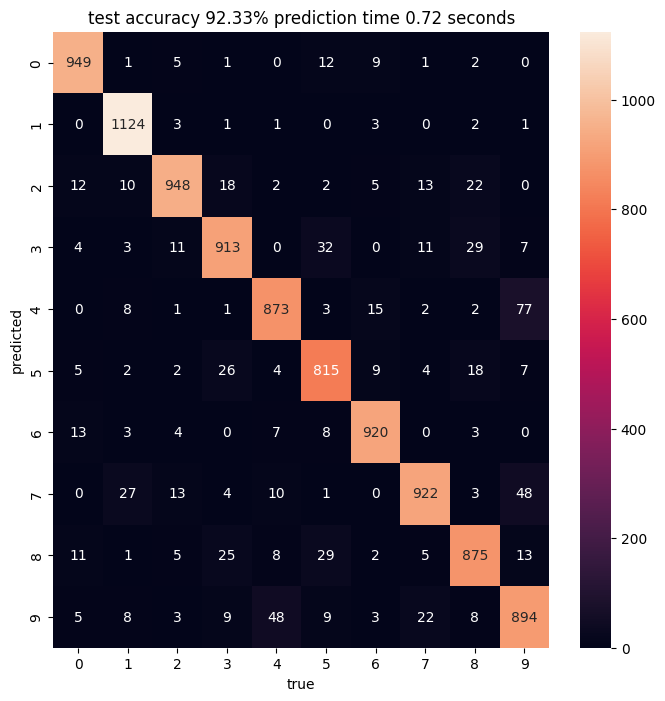

In [ ]:
#LUKE CAPRIO
#Digit Recognition Using Machine Learning Algorithms: K-Means Clustering and K-Nearest Neighbors
#May 7th 2024

# This program uses machine learning to recognize and analyze handwritten digits
#from the MNIST dataset. It first preprocesses the images, then uses KMeans
#clustering to identify common patterns within each digit. Finally, it trains
#a K-Nearest Neighbors (KNN) model with these patterns and evaluates its accuracy
#and speed on test data, visualizing the results with a confusion matrix to show
#how well the model performs in predicting each digit.


# This cell loads various libraries necessary for creating visualizations, performing numerical calculations,
# building machine learning models, and working with the MNIST dataset of handwritten digits.
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import time
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

# This cell loads the MNIST dataset and preprocesses it. It converts the images into a format suitable for
# training a machine learning model by normalizing their pixel values to be between 0 and 1.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# This cell reshapes the training and testing data into a format required by the machine learning model
# and prints out the number of samples in each dataset to confirm the data size.
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

# This cell visualizes the distribution of different digits in the training dataset. It uses a bar chart to show
# the frequency of each digit (from 0 to 9), helping us understand how many images of each digit are available for training.
train_digit_counts = np.bincount(y_train)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10), train_digit_counts)
plt.xlabel("Digit 0-9")
plt.ylabel("number of images")
plt.title("training digit frequency")
plt.xticks(np.arange(10))
plt.show()

# This cell creates a bar chart to visualize the distribution of digits in the testing dataset. It displays
# the number of images available for each digit from 0 to 9, allowing us to see if the testing data is similarly distributed as the training data.
test_digit_counts = np.bincount(y_test)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10), test_digit_counts)
plt.xlabel("Digit 0-9")
plt.ylabel("number of images")
plt.title("testing digit frequency")
plt.xticks(np.arange(10))
plt.show()

# This cell organizes the training images into separate groups based on their digit labels (0-9).
# Each group contains all images of a specific digit, making it easier to access and analyze them by category.
groups = [[],[],[],[],[],[],[],[],[],[]]
for i in range(len(x_train)):
    image = x_train[i]
    label = y_train[i]
    groups[label].append(image)

# This cell prints the shapes of the training data arrays. The output shows the number of images and their dimensions,
# as well as the structure of the labels, helping us verify the data format and size.
print(x_train.shape)
print(y_train.shape)

# This cell applies the KMeans clustering algorithm to each group of digit images from 0 to 9. It clusters the images
# into 9 groups per digit to find common patterns or variations within each type of digit. The results include the
# cluster centers and labels for the images in each group, helping us understand the intra-digit variations.
from sklearn.cluster import KMeans
centers = [[],[],[],[],[],[],[],[],[],[]]
labels = [[],[],[],[],[],[],[],[],[],[]]

for digit in range(10):
    kmeans = KMeans(n_clusters=9)
    kmeans.fit(groups[digit])
    labels[digit] = kmeans.predict(groups[digit])
    centers[digit] = kmeans.cluster_centers_

# This cell defines a function named 'plot_digits' that visualizes the cluster centers for a given digit.
# It displays 9 images, each representing the center of a cluster, in a 3x3 grid format. This helps to visually
# inspect the common features or patterns found within each cluster of the same digit.
def plot_digits(digit):
    fig, axs = plt.subplots(3, 3, figsize=(8, 8))
    axs[0, 0].imshow(centers[digit][0].reshape(28, 28), cmap='gray')
    axs[0, 0].axis('off')
    axs[0, 0].set_title("Digit " + str(digit) + " cluster 0")

    axs[0, 1].imshow(centers[digit][1].reshape(28, 28), cmap='gray')
    axs[0, 1].axis('off')
    axs[0, 1].set_title("Digit " + str(digit) + " cluster 1")

    axs[0, 2].imshow(centers[digit][2].reshape(28, 28), cmap='gray')
    axs[0, 2].axis('off')
    axs[0, 2].set_title("Digit " + str(digit) + " cluster 2")

    axs[1, 0].imshow(centers[digit][3].reshape(28, 28), cmap='gray')
    axs[1, 0].axis('off')
    axs[1, 0].set_title("Digit " + str(digit) + " cluster 3")

    axs[1, 1].imshow(centers[digit][4].reshape(28, 28), cmap='gray')
    axs[1, 1].axis('off')
    axs[1, 1].set_title("Digit " + str(digit) + " cluster 4")

    axs[1, 2].imshow(centers[digit][5].reshape(28, 28), cmap='gray')
    axs[1, 2].axis('off')
    axs[1, 2].set_title("Digit " + str(digit) + " cluster 5")

    axs[2, 0].imshow(centers[digit][6].reshape(28, 28), cmap='gray')
    axs[2, 0].axis('off')
    axs[2, 0].set_title("Digit " + str(digit) + " cluster 6")

    axs[2, 1].imshow(centers[digit][7].reshape(28, 28), cmap='gray')
    axs[2, 1].axis('off')
    axs[2, 1].set_title("Digit " + str(digit) + " cluster 7")

    axs[2, 2].imshow(centers[digit][8].reshape(28, 28), cmap='gray')
    axs[2, 2].axis('off')
    axs[2, 2].set_title("Digit " + str(digit) + " cluster 8")
    plt.show()

# This cell calls the 'plot_digits' function for each digit from 0 to 9. It displays the cluster centers for
# each digit, showing how the KMeans algorithm has identified different variations of each digit in separate clusters.
plot_digits(0)
plot_digits(1)
plot_digits(2)
plot_digits(3)
plot_digits(4)
plot_digits(5)
plot_digits(6)
plot_digits(7)
plot_digits(8)
plot_digits(9)

# This cell outputs the dimensions of both the training and testing datasets, as well as the cluster centers and labels
# for the first group of digit '0'. This is useful for verifying the sizes and structures of our data arrays and clustering results,
# ensuring everything is correctly prepared for any subsequent analyses or operations.
print(x_test.shape)
print(y_test.shape)
print(centers[0].shape)
print(labels[0].shape)
print(x_train.shape)
print(y_train.shape)

# This cell creates approximate training datasets using the cluster centers. It concatenates the centers
# from all digit clusters to form a new set of training images, 'x_train_approx'. Additionally, it generates
# corresponding labels, 'y_train_approx', where each cluster's center is labeled with its respective digit, repeated for
# each of the nine clusters per digit. This helps simulate a simplified version of the original dataset for analysis or training.
x_train_approx = np.concatenate(centers)
y_train_approx = np.concatenate([[str(digit)] * 9 for digit in range(10)])

# This cell sets up and trains a K-Nearest Neighbors (KNN) model using the approximate training dataset. It then uses this model
# to predict labels for the test dataset, measuring the time taken to make these predictions. The prediction time is then rounded
# and printed, providing a performance metric for how quickly the model can operate on the test data.
model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_train_approx, y_train_approx)

t_start = time.time()
y_pred = model.predict(x_test)
t_end=time.time()
y_pred = y_pred.astype(int)

pred_time = t_end-t_start
pred_time_rounded = round(pred_time,2)

print('training time cost (seconds):', pred_time)


# This cell calculates and prints the accuracy of the K-Nearest Neighbors model by comparing the predicted labels
# with the actual labels from the test dataset. The accuracy is presented as a percentage, providing a clear measure
# of how well the model performs on unseen data.
from sklearn.metrics import accuracy_score
# Calculate testing accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100

print("Testing Accuracy:", str(accuracy_percent) + "%")

# This cell imports necessary libraries and plots a confusion matrix for the predictions made by the KNN model.
# The confusion matrix is displayed as a heatmap, showing how often each actual digit was predicted as each possible digit.
# This visual representation helps identify which digits are most frequently confused by the model. Additional details
# such as the test accuracy percentage and prediction time in seconds are included in the plot's title for quick reference.
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sn.heatmap(conf_matrix, annot=True, fmt=".4g")
plt.title(f"test accuracy {accuracy_percent:.2f}% prediction time {pred_time_rounded} seconds")
plt.xlabel("true")
plt.ylabel("predicted")
plt.show()



11490434/11490434 [==============================] - 0s 0us/step
60000 training samples
10000 test samples
Prediction time (seconds): 38.27
Testing Accuracy: 96.91%


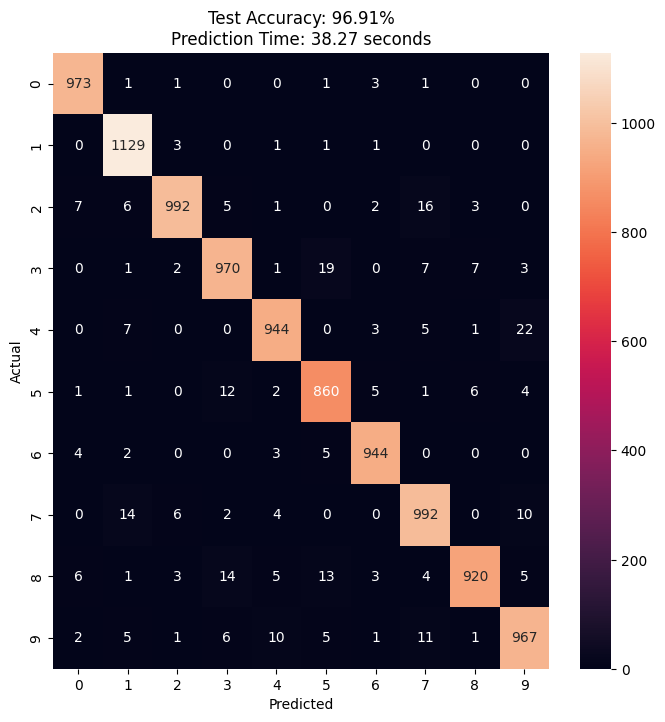

In [ ]:
#GENERIC MODEL WITHOUT KMEANS

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import time
from tensorflow.keras.datasets import mnist

# This cell loads the MNIST dataset and preprocesses it. It converts the images into a format suitable for
# training a machine learning model by normalizing their pixel values to be between 0 and 1.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# This cell reshapes the training and testing data into a format required by the machine learning model.
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

# Train K-Nearest Neighbors (KNN) model with the full training dataset
model = KNeighborsClassifier(n_neighbors=1)
t_start = time.time()
model.fit(x_train, y_train)

# Use this model to predict labels for the test dataset, measure the time taken to make these predictions.
y_pred = model.predict(x_test)
t_end = time.time()

# Output prediction time and performance metrics
pred_time = t_end - t_start
print('Prediction time (seconds):', round(pred_time, 2))

# Calculate and print the accuracy of the K-Nearest Neighbors model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", f"{accuracy * 100:.2f}%")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sn.heatmap(conf_matrix, annot=True, fmt=".4g")
plt.title(f"Test Accuracy: {accuracy * 100:.2f}%\nPrediction Time: {round(pred_time, 2)} seconds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
